In [ ]:
""" LangSmith 트레이싱 - 세션 시작/재시작 후 맨 먼저 실행 """
""" API KEY 입력 필수 """

import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = "lsv2_*"  # smith.langchain.com → Settings → API Keys
os.environ["LANGCHAIN_PROJECT"] = "TEST"

간단한 prompt tuning으로 역할 (메모리) 부여

방법 1

In [3]:
from langchain.messages import HumanMessage, AIMessage, SystemMessage
from langchain.chat_models import init_chat_model
from pprint import pprint

model = init_chat_model(
    model="llama3.2:3b", 
    model_provider="ollama",
    temperature=0.8,
)

system_message = SystemMessage(content="You are a rocket expert.")
human_message = HumanMessage(content="Hello, I have a question")

messages = [system_message, human_message]
response = model.invoke(messages)

pprint(response.model_dump())

{'additional_kwargs': {},
 'content': "I'd be happy to help with your rocket-related question. Go ahead "
            'and ask away!',
 'id': 'lc_run--019c2797-c5ac-7110-8793-973ce06a4c1a-0',
 'invalid_tool_calls': [],
 'name': None,
 'response_metadata': {'created_at': '2026-02-04T07:39:44.4731318Z',
                       'done': True,
                       'done_reason': 'stop',
                       'eval_count': 19,
                       'eval_duration': 203696800,
                       'load_duration': 131734300,
                       'logprobs': None,
                       'model': 'llama3.2:3b',
                       'model_name': 'llama3.2:3b',
                       'model_provider': 'ollama',
                       'prompt_eval_count': 37,
                       'prompt_eval_duration': 203576900,
                       'total_duration': 549327300},
 'tool_calls': [],
 'type': 'ai',
 'usage_metadata': {'input_tokens': 37,
                    'output_tokens': 19,
      

방법 2

In [12]:
messages = [
    {"role": "system", "content": "you are helpful assistant"},
    {"role": "human", "content": "Hello, I'm Jtoh 29"},
    {"role": "ai", "content": "Hello, Jtoh 29 "},
    {"role": "human", "content": "What is my name and age?"},
]

response = model.invoke(messages)
pprint(response.model_dump())

{'additional_kwargs': {},
 'content': 'You introduced yourself as "Jtoh" but you mentioned your age, '
            'which is 29. Is that correct?',
 'id': 'lc_run--019c279a-2198-7790-987a-cbbbadda0ad0-0',
 'invalid_tool_calls': [],
 'name': None,
 'response_metadata': {'created_at': '2026-02-04T07:42:19.306465Z',
                       'done': True,
                       'done_reason': 'stop',
                       'eval_count': 25,
                       'eval_duration': 277573400,
                       'load_duration': 149377600,
                       'logprobs': None,
                       'model': 'llama3.2:3b',
                       'model_name': 'llama3.2:3b',
                       'model_provider': 'ollama',
                       'prompt_eval_count': 63,
                       'prompt_eval_duration': 339112400,
                       'total_duration': 780582000},
 'tool_calls': [],
 'type': 'ai',
 'usage_metadata': {'input_tokens': 63,
                    'output_tokens'

#### LangSmith - Tracing 에서 상기 입력했던
> os.environ["LANGCHAIN_PROJECT"] = "TEST"
#### 이름으로 작성된 project에 로그가 쌓이고 있을 것이다.
#### 없다면 Project를 설정해준 
#### LANGCHAIN_PROJECT 이름으로 직접 생성 후 다시 시도

---

# Agent

In [20]:
### local 모델은 학습되지 않은 내용을 물어보면 몰라서 이상한 답변을 얻음

from langchain.chat_models import init_chat_model
from pprint import pprint

model = init_chat_model(
    model="llama3.2:3b", 
    model_provider="ollama",
    temperature=0.8,
)

response = model.invoke("현재 알라딘에서 베스트셀러 Top10 뭐야?")

pprint(response.model_dump())

{'additional_kwargs': {},
 'content': '현재 알라딘에 있는 베스트 셀러 ТОП 10은 다음과 같습니다.\n'
            '\n'
            '*   "인생의 정义 - \'오스카\'를 위한 100 pages" (이디-thor)\n'
            '*   "도전적 인 아르타" (이디-thor)\n'
            '*   "자유의 조건" (이디-thor)\n'
            '*   "여왕, 여성, 여성isme" (이디-thor)\n'
            '*   "아름다움과 아름다운 사람들" (이디-thor)\n'
            '*   "나의 이중성" (이디-thor)\n'
            '*   "자유를 주는 것: 사회적 해방의 이론" (이디-thor)\n'
            '*   "마인드 풀: 상상력에 대한 일기" (이디-thor)\n'
            '*   "그들, 그들은 그들의 방법" (이디-thor)\n'
            '*   "그것은 그들이 muốn하는 대로 이뤄야 할 것" (이디-thor)\n'
            '\n'
            '이 정보는 2024년 12월 기준으로 제공되며, 현재 bestselling 책이 될 수 있는 책이 될 수 있음을 '
            '명시합니다.',
 'id': 'lc_run--019c279f-1558-7293-88b6-6d7fffc1cbcc-0',
 'invalid_tool_calls': [],
 'name': None,
 'response_metadata': {'created_at': '2026-02-04T07:47:46.7756362Z',
                       'done': True,
                       'done_reason': 'stop',
                       'eval_count': 256,
          

#### 알라딘 API Key 발급 받기
> https://blog.aladin.co.kr/openapi/popup/6695306

In [ ]:
## 알라딘 웹 사이트 조회 Agent 생성
from langchain.tools import tool
from typing import List, Dict, Any

import requests

@tool
def fetch_aladin_bestseller_top10() -> List[Dict[str, Any]]:
    """
    알라딘 베스트셀러 목록을 조회하고 Top N개(기본 10)를 반환합니다.
    """
    url = "http://www.aladin.co.kr/ttb/api/ItemList.aspx"
    params = {
        "ttbkey": "API Key", # 알라딘 API Key
        "QueryType": "Bestseller",
        "MaxResults": 10,
        "start": 1,
        "SearchTarget": "Book",
        "output": "js",
        "Version": "20131101"
    }
    resp = requests.get(url, params=params)
    resp.raise_for_status()
    data = resp.json()
    items = data.get("item", [])
    top10 = items[:10]
    return top10


In [23]:
from langchain.agents import create_agent

agent = create_agent(model, tools=[fetch_aladin_bestseller_top10])

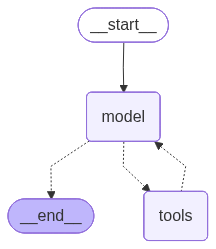

In [24]:
agent

In [25]:
response = agent.invoke({"messages": [{"role": "user", "content": "현재 알라딘에서 베스트셀러 Top10 뭐야?"}]})
response

{'messages': [HumanMessage(content='현재 알라딘에서 베스트셀러 Top10 뭐야?', additional_kwargs={}, response_metadata={}, id='2ff55d08-062b-4c69-850a-cceced7e16f9'),
  AIMessage(content='', additional_kwargs={}, response_metadata={'model': 'llama3.2:3b', 'created_at': '2026-02-04T07:50:16.9495681Z', 'done': True, 'done_reason': 'stop', 'total_duration': 725439500, 'load_duration': 163720600, 'prompt_eval_count': 172, 'prompt_eval_duration': 293213500, 'eval_count': 23, 'eval_duration': 258642000, 'logprobs': None, 'model_name': 'llama3.2:3b', 'model_provider': 'ollama'}, id='lc_run--019c27a1-6b9e-7d32-9ad6-2b3877fac2dc-0', tool_calls=[{'name': 'fetch_aladin_bestseller_top10', 'args': {'limit': '10'}, 'id': '4a77667d-33b6-4be6-8b1a-23788561185c', 'type': 'tool_call'}], invalid_tool_calls=[], usage_metadata={'input_tokens': 172, 'output_tokens': 23, 'total_tokens': 195}),
  ToolMessage(content='[{"title": "이해찬 회고록 - 꿈이 모여 역사가 되다", "link": "https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=301751513&am

In [26]:
# 이쁜 출력

def print_agent_step(response):
    print(f"{' [ Agentic Workflow Log ] ':^60}")
    print("="*60)
    
    for i, msg in enumerate(response['messages']):
        role = msg.__class__.__name__.replace("Message", "")
        print(f"[{i+1}] {role}:", end=" ")
        
        # 1. 툴 호출 시 (AIMessage with tool_calls)
        if hasattr(msg, 'tool_calls') and msg.tool_calls:
            print(f"🛠️ 도구 호출 중... ({msg.tool_calls[0]['name']})")
        
        # 2. 툴 실행 결과 (ToolMessage)
        elif role == "Tool":
            print(f"✅ 데이터 수집 완료 (데이터 {len(msg.content)}자)")
        
        # 3. 일반 텍스트 응답 (Human/AI Message)
        else:
            print(msg.content)
            
        print("-" * 60)

# 실행
print_agent_step(response)

                  [ Agentic Workflow Log ]                  
[1] Human: 현재 알라딘에서 베스트셀러 Top10 뭐야?
------------------------------------------------------------
[2] AI: 🛠️ 도구 호출 중... (fetch_aladin_bestseller_top10)
------------------------------------------------------------
[3] Tool: ✅ 데이터 수집 완료 (데이터 8563자)
------------------------------------------------------------
[4] AI: 현재 알라딘의 베스트셀러 Top10은 다음과 같습니다.

1.  **"이해찬 회고록 - 꿈이 모여 역사가 되다"** 
    *   저자: 이해chan
    *   출판사: 돌베개
    *   가격: 23,000원
2.  **"괴테는 모든 것을 말했다 - 제172회 아쿠타가와상 수상작"**
    *   저자: 스즈키 유이, 이지수
    *   출판사: 리프
    *   가격: 17,000원
3.  **"눈과 돌멩이 - 2026년 제49회 이상문학상 작품집"**
    *   저자: 위수정, 김혜진, 성혜령, 이민진, 정이현, 함윤이
    *   출판사: 다산책방
    *   가격: 16,200원
4.  **"떠난 것은 돌아오지 않는다"**
    *   저자: 줄리언 반스 (지은이), 
    *   출판사: 문학동네
    *   가격: 17,000원
5.  **"자본주의 시대에서 살아남기 위한 최소한의 경제 공부"**
    *   저자: 백억남(김욱현)
    *   출판사: 하이스트
    *   가격: 28,000원
6.  **"혼모노"**
    *   저자: 성해나 (지은이)
    *   출판사: 창비
    *   가격: 18,000원
7.  **"모순 - 개정판"**
 

In [ ]:
# 설치 안되어 있다면: !pip install rich
from rich import print as rprint

rprint(response)


# AIMessage 에서 바로 답변이 오는 것이 아닌
# tool_calls로 위에서 정의한 @tools 데코레이터 호출이 진행된 모습
# 이후 ToolMessage 에서 툴 호출 결과가 오는 것을 확인할 수 있음

{
    'messages': [
        HumanMessage(
            content='현재 알라딘에서 베스트셀러 Top10 뭐야?',
            additional_kwargs={},
            response_metadata={},
            id='2ff55d08-062b-4c69-850a-cceced7e16f9'
        ),
        AIMessage(
            content='',
            additional_kwargs={},
            response_metadata={
                'model': 'llama3.2:3b',
                'created_at': '2026-02-04T07:50:16.9495681Z',
                'done': True,
                'done_reason': 'stop',
                'total_duration': 725439500,
                'load_duration': 163720600,
                'prompt_eval_count': 172,
                'prompt_eval_duration': 293213500,
                'eval_count': 23,
                'eval_duration': 258642000,
                'logprobs': None,
                'model_name': 'llama3.2:3b',
                'model_provider': 'ollama'
            },
            id='lc_run--019c27a1-6b9e-7d32-9ad6-2b3877fac2dc-0',
            tool_calls=[
                {
                    'name': 'fetch_aladin_bestseller_top10',
                    'args': {'limit': '10'},
                    'id': '4a77667d-33b6-4be6-8b1a-23788561185c',
                    'type': 'tool_call'
                }
            ],
            invalid_tool_calls=[],
            usage_metadata={'input_tokens': 172, 'output_tokens': 23, 'total_tokens': 195}
        ),
        ToolMessage(
            content='[{"title": "이해찬 회고록 - 꿈이 모여 역사가 되다", "link": 
"https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=301751513&amp;partner=openAPI&amp;start=api", "author": "이해찬
(지은이)", "pubDate": "2022-09-21", "description": "정치인 이해찬의 평생의 기록이다. 전 국회의원 최민희가 질문하고 
이해찬이 대답하는, 대담집 형태로 이루어졌다. 대담과 집필, 편집 작업 등 2년여의 시간을 들여 이 책을 완성하였다.", 
"isbn": "K442839798", "isbn13": "9791191438826", "itemId": 301751513, "priceSales": 20700, "priceStandard": 23000, 
"mallType": "BOOK", "stockStatus": "예약판매", "mileage": 1150, "cover": 
"https://image.aladin.co.kr/product/30175/15/coversum/k442839798_1.jpg", "categoryId": 51220, "categoryName": 
"국내도서>사회과학>정치학/외교학/행정학>정치인", "publisher": "돌베개", "salesPoint": 363206, "adult": false, 
"fixedPrice": true, "customerReviewRank": 10, "bestDuration": "종합 100위 3주", "bestRank": 1, "subInfo": {}}, 
{"title": "괴테는 모든 것을 말했다 - 제172회 아쿠타가와상 수상작", "link": 
"https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=376765918&amp;partner=openAPI&amp;start=api", "author": "스즈키
유이 (지은이), 이지수 (옮긴이)", "pubDate": "2025-11-18", "description": "23세 대학원생 스즈키 유이의 첫 
장편소설로, 제172회 아쿠타가와상을 수상했다. 일본 언론은 그를 움베르토 에코, 칼비노, 보르헤스에 견주며 “일본 문학의
샛별”이라 극찬했다. 스무 살 남짓한 청년이 쓴 이 작품에서는 고전문학의 풍부한 깊이와 신인만의 참신함이 동시에 
느껴진다.", "isbn": "K212032349", "isbn13": "9791194530701", "itemId": 376765918, "priceSales": 15300, 
"priceStandard": 17000, "mallType": "BOOK", "stockStatus": "", "mileage": 850, "cover": 
"https://image.aladin.co.kr/product/37676/59/coversum/k212032349_3.jpg", "categoryId": 50998, "categoryName": 
"국내도서>소설/시/희곡>일본소설>1950년대 이후 일본소설", "publisher": "리프", "salesPoint": 294815, "adult": false,
"fixedPrice": true, "customerReviewRank": 9, "bestDuration": "종합 1위 4주", "bestRank": 2, "subInfo": {}}, 
{"title": "눈과 돌멩이 - 2026년 제49회 이상문학상 작품집", "link": 
"https://www.aladin.co.kr/shop/wproduct.aspx?ItemId=384961655&amp;partner=openAPI&amp;start=api", "author": 
"위수정, 김혜진, 성혜령, 이민진, 정이현, 함윤이 (지은이)", "pubDate": "2026-01-23", "description": "제49회 
이상문학상 대상에 위수정의 「눈과 돌멩이」가 선정되었다. “죽은 자가 산 자의 여행을 기획하고 산 자가 죽은 자와의 
약속을 기꺼이 수행”(신수정 문학평론가)하는 이야기를 담은 이 소설은, 시리도록 아름다운 설경과 그 속에 감추어진 
아득한 진실을 향해 독자를 빠져들게 만드는 수작이다.", "isbn": "K622135312", "isbn13": "9791130674643", "itemId": 
384961655, "priceSales": 16200, "priceStandard": 18000, "mallType": "BOOK", "stockStatus": "", "mileage": 900, 
"cover": "https://image.aladin.co.kr/product/38496/16/coversum/k622135312_1.jpg", "categoryId": 50993, 
"categoryName": "국내도서>소설/시/희곡>한국소설>2000년대 이후 한국소설", "publisher": "다산책방", "salesPoint": 
70160, "adult": false, "fixedPrice": true, "customerReviewRank": 9, "bestRank": 3, "seriesInfo": {"seriesI